### geojson

<img src="images/geojson.png" width=150>

geojson ファイルは地理的な json ファイルであり、json は「JavaScript オブジェクト表記法」を表します。 JavaScript 形式として相互運用性が高く、Python を含むほとんどの GIS アプリケーションで使用できます。 また、オープンソース データ ソリューションとしても広く受け入れられており、オンライン空間データの視覚化およびオーサリング ツールである geojson.io によってサポートされています。 これは、Python ベースの GIS 解析に推奨されるアプローチです。

[geojson.io](https://geojson.io/)

In [2]:
import geopandas as gpd
import pandas as pd

## Part 1 - GIS Dataのダウンロードと読み込み

<img src="images/kokudo.png" width=400>

このラボではすでに【千葉県】の行政区域データを国土交通省からダウンロードしたものを使います。クラスサイトから`chiba_ku.geojson`をダウンロードできますが、元のデータはここからobtainした：

https://nlftp.mlit.go.jp/

ダウンロードする順序は：

- ➡️ 国土数値情報
- ➡️ 行政区域
- ➡️ 千葉県

＊注意：ダウンロードするにあたりアンケートを記入後、.zipファイルを unzip する必要がある。

unzip したファイルの中の N03-23_12_230101.geojson を今週のフォルダーの中に入れる。このラボではこのgeojsonファイルを`chiba_ku.geojson`とrenameされたものを使う。

In [3]:
# データを変数に入れる
chiba_ku = gpd.read_file('chiba_ku.geojson')

<Axes: >

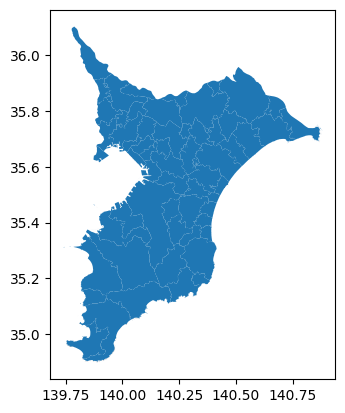

In [4]:
# とりあえずマップとしてアウトプット
chiba_ku.plot()

In [5]:
# 最初の５列は？
chiba_ku.sample(6)

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
1343,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.85654 34.90463, 139.85647 34.904..."
637,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((140.01080 35.03484, 140.01081 35.034..."
1497,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.93024 34.91122, 139.93023 34.911..."
451,千葉県,NaN,NaN,館山市,12205,"POLYGON ((139.76100 34.95896, 139.76098 34.958..."
1174,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.84140 34.90252, 139.84136 34.902..."
1879,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.96599 34.95475, 139.96599 34.954..."


In [6]:
# データの情報
chiba_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2265 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2265 non-null   object  
 4   N03_007   2265 non-null   object  
 5   geometry  2265 non-null   geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 106.3+ KB


## Part 2 - 国勢調査データをダウンロード

<img src="images/estat.png" width=400>

https://www.e-stat.go.jp/

次に、国勢調査の【人口総数】データをダウンロードします。 このデータは後に先ほどダウンロードした千葉区データと merge (join) します。

ダウロードする順序：

- ➡️ 統計データを活用する 
- ➡️ 地図 
- ➡️ 統計データダウンロード 
- ➡️ 国勢調査 
- ➡️ 2020年 
- ➡️ 小地域 
- ➡️ 男女別人口総数及び世帯総数
- ➡️ 12 千葉県　CSV

### Data cleanup

データを使用できるようにするには、まず Excel でデータをクリーンアップする必要があります。 

🧐　ここで注意！e-Statでは【CSV】とは書いてあるもののダウンロードして unzip してみたところ 【txt】ファイルではないか！

txt ファイルを Excel で開きます。

<img src="images/excel import txt.png" width=500>

次にヘッダーを変えます。これから：

<img src="images/excel1.png" width=500>



これに：

<img src="images/excel2.png" width=500>



空白の２行目を削除するように

<img src="images/excel3.png" width=500>

最後にファイルを「名前つけて保存」(save as)をして CSV UTF-8 フォーマットで chiba.csv と名づけて保存。

<img src="images/excel utf.png" width=500>

In [7]:
chiba_pop = pd.read_csv('chiba_04.csv')

In [8]:
chiba_pop.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,人口総数,男,女,世帯総数
1,12101.0,1.0,千葉市中央区,NaN,0.0,NaN,NaN,211736,105766,105970,109336
2,121010010.0,2.0,千葉市中央区,青葉町,0.0,NaN,NaN,2671,1238,1433,1042
3,121010020.0,2.0,千葉市中央区,赤井町,0.0,NaN,NaN,1811,885,926,594
4,121010030.0,2.0,千葉市中央区,旭町,0.0,NaN,NaN,1054,520,534,563


In [9]:
chiba_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KEY_CODE  6767 non-null   float64
 1   HYOSYO    6767 non-null   float64
 2   CITYNAME  6767 non-null   object 
 3   NAME      6706 non-null   object 
 4   HTKSYORI  6767 non-null   float64
 5   HTKSAKI   0 non-null      float64
 6   GASSAN    0 non-null      float64
 7   人口総数      6768 non-null   object 
 8   男         6768 non-null   object 
 9   女         6768 non-null   object 
 10  世帯総数      6768 non-null   object 
dtypes: float64(5), object(6)
memory usage: 581.8+ KB


## Part 3 - GISデータと国勢調査データを`Merge`する

<img src="images/merge.png" width=500>

Mergeするには次のチェックポイントを確認：

1. mergeするfieldを決める
1. field names が同じであることを確認。違う場合は同じにする。
1. field達が同じ data type であることを確認

この二つがオッケーであれば merge function を使って実行 

### 3-1 Mergeするfieldを決めよう

- `chiba_ku` → `N03_007`
- `chiba_pop` → `KEY_CODE`

### 3-2 field names を揃えよう

<img src="images/merge2.png" width=500>

残念ながらmergeするfieldnameが違う😩

`rename` functionを使って一致するようにしましょう。

この場合は `KEY_CODE` に一致しよう。

In [10]:
# rename
chiba_ku.rename(columns={'N03_007':'KEY_COD'},inplace=True)

In [11]:
# check the new fieldname
chiba_ku

,N03_001,N03_002,N03_003,N03_004,KEY_COD,geometry
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588..."
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624..."
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709..."
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673..."
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654..."
...,...,...,...,...,...,...
2260,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82032 35.15010, 139.82028 35.150..."
2261,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82142 35.15018, 139.82139 35.150..."
2262,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82567 35.15224, 139.82554 35.152..."
2263,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.85503 35.16407, 139.85517 35.164..."


### Merge する field の data typeが同じかどうかを確認

Oh now! datatypeも違う😩

- `chiba_ku['KEY_CODE]` → OBJECT
- `chiba_pop['KEY_CODE']` → int64

では両方 int にしましょう

In [12]:
# OBJECTからintに変える
chiba_ku['KEY_CODE'] = chiba_ku['KEY_CODE'].astype(int)

KeyError: 'KEY_CODE'

In [ ]:
# checkする
chiba_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2265 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2265 non-null   object  
 4   KEY_CODE  2265 non-null   int32   
 5   geometry  2265 non-null   geometry
dtypes: float64(1), geometry(1), int32(1), object(3)
memory usage: 97.5+ KB


In [ ]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
chiba_ku_pop = chiba_ku.merge(chiba_pop,on='KEY_CODE')

c:\Users\ryu25\miniconda3\envs\gis\Lib\site-packages\geopandas\geodataframe.py:1574: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  result = DataFrame.merge(self, *args, **kwargs)


In [ ]:
# check!
chiba_ku_pop

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588...",1.0,千葉市中央区,NaN,0.0,NaN,NaN,211736,105766,105970,109336
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624...",1.0,千葉市中央区,NaN,0.0,NaN,NaN,211736,105766,105970,109336
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709...",1.0,千葉市花見川区,NaN,0.0,NaN,NaN,177328,87280,90048,81123
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673...",1.0,千葉市稲毛区,NaN,0.0,NaN,NaN,160582,80345,80237,74796
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654...",1.0,千葉市若葉区,NaN,0.0,NaN,NaN,146940,73000,73940,64840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82093 35.14996, 139.82089 35.149...",1.0,鋸南町,NaN,0.0,NaN,NaN,6993,3356,3637,3034
2260,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82032 35.15010, 139.82028 35.150...",1.0,鋸南町,NaN,0.0,NaN,NaN,6993,3356,3637,3034
2261,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82142 35.15018, 139.82139 35.150...",1.0,鋸南町,NaN,0.0,NaN,NaN,6993,3356,3637,3034
2262,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82567 35.15224, 139.82554 35.152...",1.0,鋸南町,NaN,0.0,NaN,NaN,6993,3356,3637,3034


## Part 4 - Choropleth map を作ろう

<img src="https://visualizing.jp/assets/fletcher-map-population.jpg" width=300>

そもそも Choropleth map ってなに？

https://visualizing.jp/choropleth-map/



いよいよマップの時間！

Choropleth map を作る手順は：

1. どのフィールドをマップするかを決める
1. そのフィールドが numeric であることを確認
1. マップを作る！

### 4-1 フィールドを決める

まずは人口マップを作りたいので `人口総数` フィールドを使おう。

### 4-2 フィールドが numeric であることを確認

In [ ]:
chiba_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2264 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2264 non-null   object  
 4   KEY_CODE  2264 non-null   int32   
 5   geometry  2264 non-null   geometry
 6   HYOSYO    2264 non-null   float64 
 7   CITYNAME  2264 non-null   object  
 8   NAME      0 non-null      object  
 9   HTKSYORI  2264 non-null   float64 
 10  HTKSAKI   0 non-null      float64 
 11  GASSAN    0 non-null      float64 
 12  人口総数      2264 non-null   object  
 13  男         2264 non-null   object  
 14  女         2264 non-null   object  
 15  世帯総数      2264 non-null   object  
dtypes: float64(5), geometry(1), int32(1), object(9)
memory usage: 274.3+ KB


Oh no😩! やっぱり int ではなく object だった。

Let's fix that!

In [ ]:
# change from OBJECT to int
chiba_ku_pop['人口総数'] = chiba_ku_pop['人口総数'].astype (int)

In [ ]:
# check
chiba_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2264 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2264 non-null   object  
 4   KEY_CODE  2264 non-null   int32   
 5   geometry  2264 non-null   geometry
 6   HYOSYO    2264 non-null   float64 
 7   CITYNAME  2264 non-null   object  
 8   NAME      0 non-null      object  
 9   HTKSYORI  2264 non-null   float64 
 10  HTKSAKI   0 non-null      float64 
 11  GASSAN    0 non-null      float64 
 12  人口総数      2264 non-null   int32   
 13  男         2264 non-null   object  
 14  女         2264 non-null   object  
 15  世帯総数      2264 non-null   object  
dtypes: float64(5), geometry(1), int32(2), object(8)
memory usage: 265.4+ KB


### 4-3 Let's map!

<Axes: >

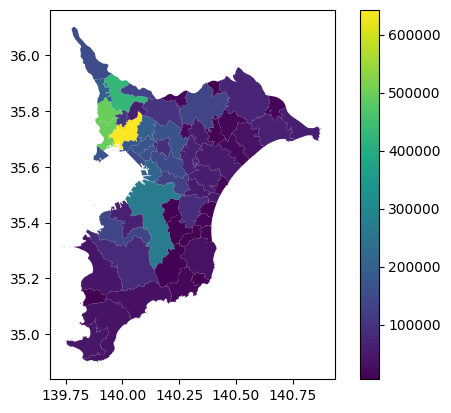

In [ ]:
chiba_ku_pop.plot(column='人口総数',legend=True)

## Size

`figsize=(10,10)`
- default (6.4,4.8)
- width, height, units in inches

<Axes: >

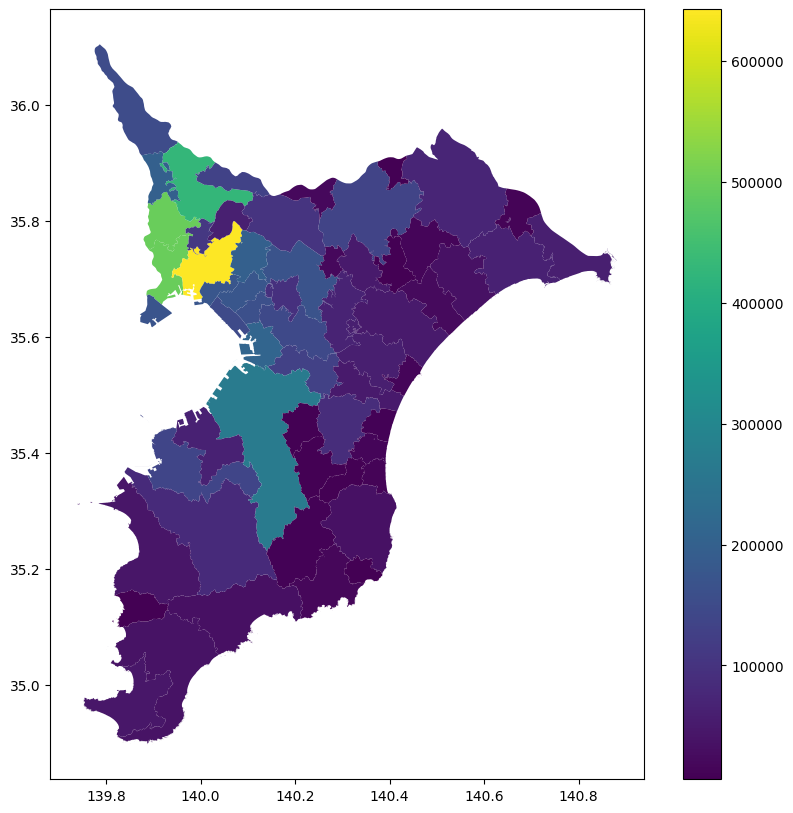

In [ ]:
chiba_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True)

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="images/sphx_glr_colormaps_002.webp">
<img src="images/sphx_glr_colormaps_003.webp">
<img src="images/sphx_glr_colormaps_004.webp">

<Axes: >

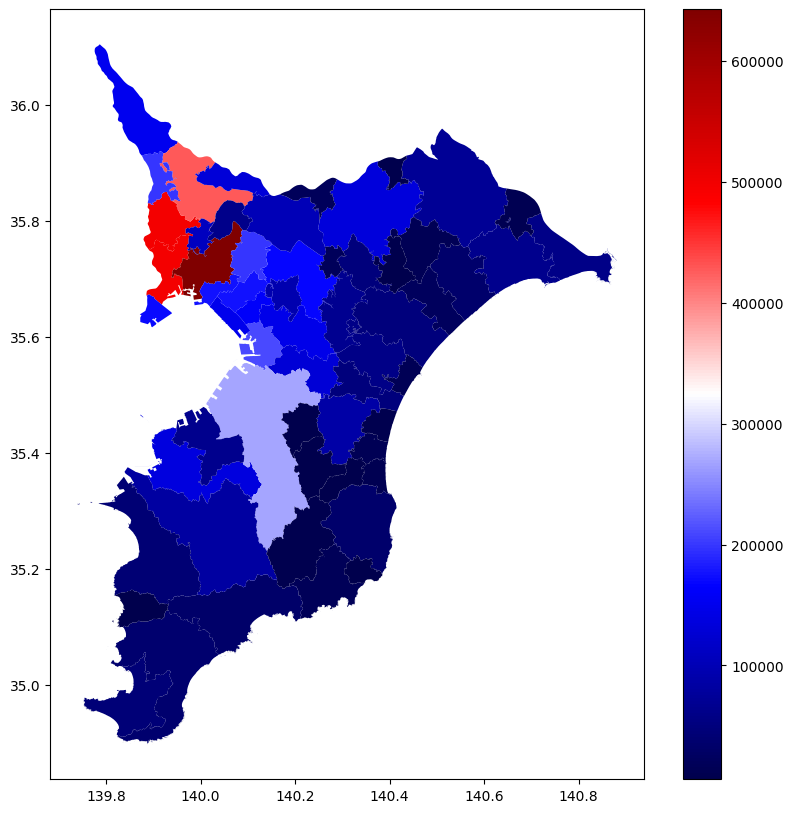

In [ ]:
chiba_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True,
                  cmap='seismic')

## Stay tuned...

We will learn many more options in subsequent weeks!